In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

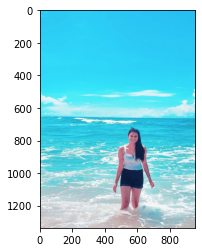

In [2]:
im=cv2.imread('Beach.jpg') #reads image in BGR format
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

original_shape=im.shape

plt.imshow(im)  #Image in real colors
plt.show()


In [3]:
shape1=im.shape[0]
shape2=im.shape[1]
shape3=im.shape[2]

In [4]:
#Flatten Each Channel of the Image
all_pixels=im.reshape((shape1*shape2,3))
print(all_pixels.shape)

(1279509, 3)


In [34]:
dominant_colors= 16  #Giving the value of K

km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
centers=np.array(km.cluster_centers_,dtype='uint8')
print(centers)

[[160 204 209]
 [ 43 202 243]
 [ 17  34  67]
 [231 244 247]
 [132  83 107]
 [194 205 208]
 [ 84 233 244]
 [179 174 180]
 [ 37 185 212]
 [ 74 202 214]
 [181 237 243]
 [121 195 205]
 [178 114 134]
 [133 232 240]
 [ 49 217 247]
 [214 223 226]]


## What's in the color palette?

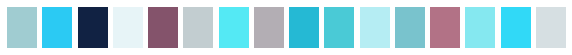

In [36]:
i=1

plt.figure(0,figsize=(10,dominant_colors))

colors=[]

for each_col in centers: #Each color
    plt.subplot(1,dominant_colors,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a=np.zeros((shape1,shape2,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [37]:
new_img=np.zeros((shape1*shape2,3),dtype='uint8')
print(new_img)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [38]:
print(colors)
print(km.labels_) #Given labels 0,1,2,3..and so on! by K Means

[array([160, 204, 209], dtype=uint8), array([ 43, 202, 243], dtype=uint8), array([17, 34, 67], dtype=uint8), array([231, 244, 247], dtype=uint8), array([132,  83, 107], dtype=uint8), array([194, 205, 208], dtype=uint8), array([ 84, 233, 244], dtype=uint8), array([179, 174, 180], dtype=uint8), array([ 37, 185, 212], dtype=uint8), array([ 74, 202, 214], dtype=uint8), array([181, 237, 243], dtype=uint8), array([121, 195, 205], dtype=uint8), array([178, 114, 134], dtype=uint8), array([133, 232, 240], dtype=uint8), array([ 49, 217, 247], dtype=uint8), array([214, 223, 226], dtype=uint8)]
[1 1 1 ... 7 7 7]


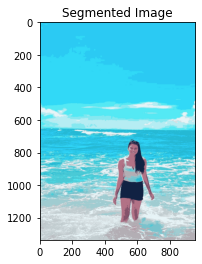

In [39]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]
    
new_img=new_img.reshape((original_shape))

plt.imshow(new_img)
plt.title('Segmented Image')
plt.show()  




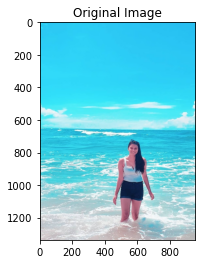

In [40]:
plt.imshow(im)
plt.title('Original Image')
plt.show()  

In [41]:
new_img_converted=cv2.cvtColor(new_img,cv2.COLOR_RGB2BGR)
cv2.imwrite('SegmentedBeach.jpg',new_img_converted)

True